In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
%matplotlib inline

In [77]:
def extractfeatures(filename):
    x=np.genfromtxt(filename,delimiter=',')
    xfeatures=x[1:,1]
    y=x[1:,2]
    return xfeatures,y

In [78]:
def normalizeFeatures(X):
    mu=np.mean(X)
    sigma=np.std(X)
    X_norm=(X - mu)/sigma
    return X_norm

In [79]:
def computeCost(X,y,theta):
    m=len(y)
    #iterative solution
    J=0
    s=0
    for i in range(0,m):
        s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
    J=s/(2*m)
    
    #vectorized solution
    y=y.reshape(m,1)
    J1=(np.dot((np.dot(X,theta)-y).T,(np.dot(X,theta)-y)))/(2*m)

    return J

In [80]:
def gradientDescent(X,y,theta,alpha,iterations):
    J_history=np.zeros((iterations,1))

    m=len(y)# number of training examples
    y=y.reshape(m,1)
    for iter in range(0,iterations):
        s1=0
        s0=0
        for i in range(0,m):
            s0+=((theta[0]+theta[1]*X[i,1])-y[i])
            s1+=((theta[0]+theta[1]*X[i,1])-y[i])*X[i,1]
        theta[0]=theta[0]-alpha*s0/m
        theta[1]=theta[1]-alpha*s1/m
        J_history[iter]=computeCost(X,y,theta)
    return theta,J_history

In [81]:
def predict(theta,X):
    return theta[0]+theta[1]*X

In [82]:
def sumSquaresError(y, y_pred):
    return round(((y - y_pred)**2).sum()/len(y),3)

In [93]:
#Load the data
X,y=extractfeatures('training.csv')#loading data from training dataset
m=len(y) # number of training examples
print("Loaded",str(m), "training examples")

Loaded 799 training examples


In [94]:
#Normalize the data
norm_X=normalizeFeatures(X)
print("Data Normalization ended")

Data Normalization ended


Text(0, 0.5, '$y$')

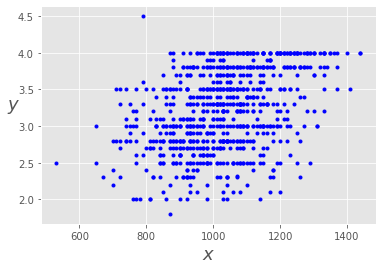

In [95]:
"""
Let's plot our data to check the relation between X and Y
"""
plt.figure(1)
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [96]:
##Analytical Solution
A = np.c_[np.ones((norm_X.size,1)),norm_X]
theta = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
print('Theta (analytical): [ {:0.3f} , {:0.3f} ]^t'.format(theta[0],theta[1]))

Theta (analytical): [ 3.214 , 0.223 ]^t


Text(0, 0.5, '$y$')

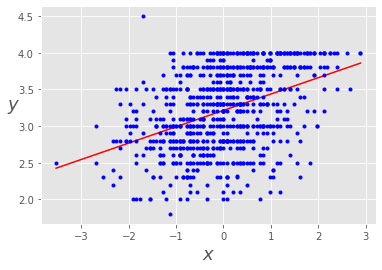

In [97]:
""" Let's plot the prediction line with the calculated theta"""

X_ln = np.array([min(norm_X),max(norm_X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-')
plt.plot(norm_X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0,2,0,15])

In [88]:
##Train the linear model 
input_X=np.c_[np.ones((m,1)),norm_X]#Add a column of ones to X
theta=np.ones((2,1))#initialize fitting parameters

iterations=100
alpha = 0.05

theta1,J_history=gradientDescent(input_X,y,theta,alpha,iterations)#gets the final data and the values of cost function in each iteration

#Training set error
print("The SSE in the training set for alpha =  ",alpha, "is ", sumSquaresError(y, predict(theta1, norm_X)))

The SSE in the training set for alpha =   0.05 is  0.245


In [89]:
theta1

array([[3.20104834],
       [0.22779511]])

Text(0, 0.5, '$y$')

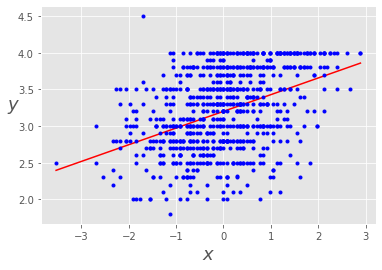

In [90]:
""" Let's plot the prediction line with the calculated theta"""

X_ln = np.array([min(norm_X),max(norm_X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta1)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-')
plt.plot(norm_X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0,2,0,15])

In [91]:
#Prediction of GPA for test dataset
test=np.genfromtxt('testfile.csv',delimiter=',')
IDs=test[1:,0]
Xtest=normalizeFeatures(test[1:,1])
Ytest=predict(theta1,Xtest)

In [92]:
# Preparing the output file
output=open("output.csv",'w')
output.write("ID,GPA\n")
for i in range(0,len(Ytest)):
    output.write(str(int(IDs[i]))+","+str(Ytest[i])+"\n")
output.close()